In [25]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

db = pymysql.connect(
    user='root',
    password='qwer1234',
    host='localhost',
    db='ubion'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

In [26]:
sql = '''
      SELECT * FROM hmm
      '''

cursor.execute(sql)
result = cursor.fetchall()
df = pd.DataFrame(result)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-04,32438.305898,37235.521130,32438.305898,35590.761719,135433,2632.2966,0.0
1,2000-01-05,34311.505880,35179.570456,33443.437914,34083.066406,150723,0.0000,0.0
2,2000-01-06,34951.137225,35819.201872,32118.493623,32255.556641,112202,0.0000,0.0
3,2000-01-07,32301.240710,33214.995123,31981.424801,32712.429688,124966,0.0000,0.0
4,2000-01-10,32895.183594,33808.941519,32529.684492,32895.183594,171010,0.0000,0.0
...,...,...,...,...,...,...,...,...
5564,2022-03-15,34500.000000,34500.000000,34500.000000,34500.000000,0,0.0000,0.0
5565,2022-03-16,32400.000000,33050.000000,31850.000000,32000.000000,5764481,0.0000,0.0
5566,2022-03-17,32000.000000,32000.000000,32000.000000,32000.000000,0,0.0000,0.0
5567,2022-03-18,32800.000000,34200.000000,32650.000000,33950.000000,10611192,0.0000,0.0


In [27]:
sql = '''
      SELECT DATE,
      ROUND(Open,2) AS Open,
      ROUND(Close,2) AS Close,
      ROUND(High,2) AS High,
      ROUND(Low,2) AS Low,
      Volume,
      ROUND(Close-Open,2) AS UP_DOWN,
      Round((Close-Open)/Open*100,2) AS UD_ration
      FROM hmm LIMIT 1000
      '''

cursor.execute(sql)
result = cursor.fetchall()
pd.DataFrame(result)

,DATE,Open,Close,High,Low,Volume,UP_DOWN,UD_ration
0,2000-01-04,32438.31,35590.76,37235.52,32438.31,135433,3152.46,9.72
1,2000-01-05,34311.51,34083.07,35179.57,33443.44,150723,-228.44,-0.67
2,2000-01-06,34951.14,32255.56,35819.20,32118.49,112202,-2695.58,-7.71
3,2000-01-07,32301.24,32712.43,33215.00,31981.42,124966,411.19,1.27
4,2000-01-10,32895.18,32895.18,33808.94,32529.68,171010,0.00,0.00
...,...,...,...,...,...,...,...,...
995,2003-10-28,39519.91,39748.35,41301.73,39291.47,480321,228.44,0.58
996,2003-10-29,40707.79,44682.62,45687.75,40205.22,1484445,3974.83,9.76
997,2003-10-30,45230.87,42855.11,45596.38,42169.79,753239,-2375.76,-5.25
998,2003-10-31,43403.36,43403.36,44911.06,41849.98,699370,0.00,0.00


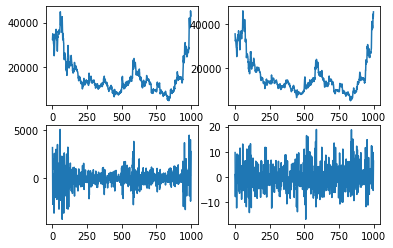

In [30]:
result = pd.DataFrame(result)

plt.subplot(2,2,1)
plt.plot(result.Open)

plt.subplot(2,2,2)
plt.plot(result.Close)

plt.subplot(2,2,3)
plt.plot(result.UP_DOWN)

plt.subplot(2,2,4)
plt.plot(result.UD_ration)
plt.show()